Reference:
[https://www.section.io/engineering-education/multi-label-classification-with-scikit-multilearn/](https://www.section.io/engineering-education/multi-label-classification-with-scikit-multilearn/)

Example:
[https://www.kaggle.com/code/rhodiumbeng/classifying-multi-label-comments-0-9741-lb](https://www.kaggle.com/code/rhodiumbeng/classifying-multi-label-comments-0-9741-lb)


In [1]:
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True)
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt 
from matplotlib import rcParams

In [2]:
df = pd.read_csv("/content/gen_data_pre_b.csv")

# Analysis Results with Imbalanced dataset

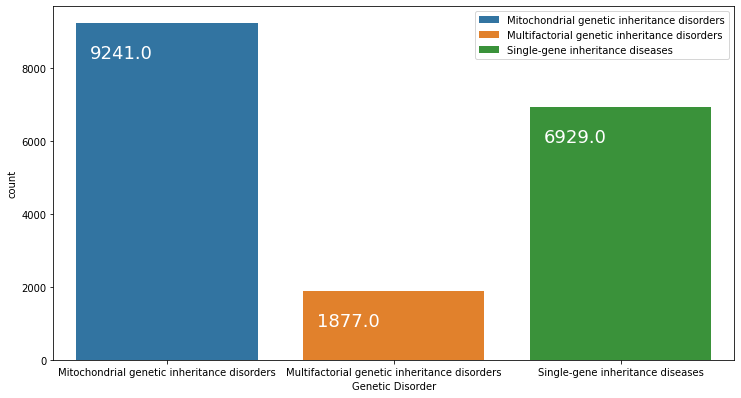

In [ ]:
rcParams['figure.figsize'] = 12.2,6.5
ax = sns.countplot(data=df, x="Genetic Disorder", hue='Genetic Disorder', dodge=False) 
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
h,l = ax.get_legend_handles_labels()
labels=["Mitochondrial genetic inheritance disorders", "Multifactorial genetic inheritance disorders",'Single-gene inheritance diseases']
ax.legend(h,labels,loc="upper right") 
plt.show()

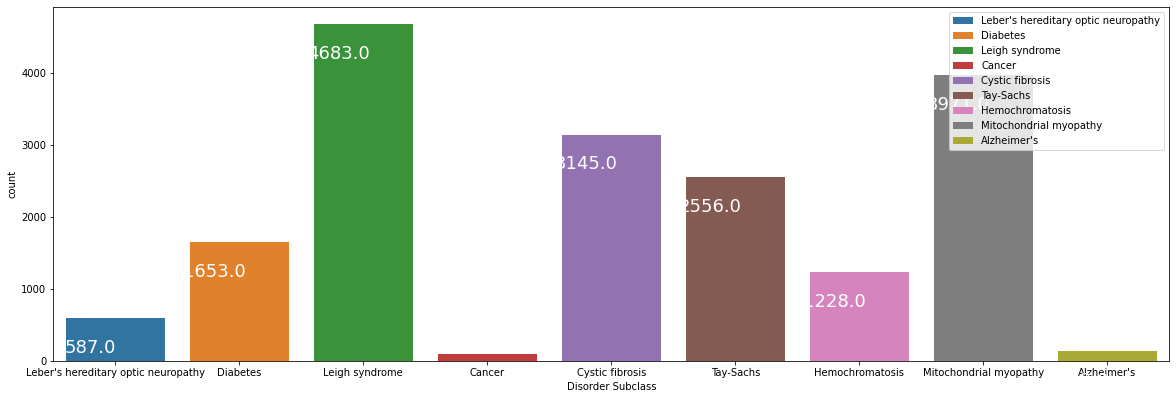

In [ ]:
rcParams['figure.figsize'] = 20,6.5
ax = sns.countplot(data=df, x="Disorder Subclass", hue='Disorder Subclass', dodge=False) 
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
h,l = ax.get_legend_handles_labels()
labels=["Leber's hereditary optic neuropathy", 'Diabetes',
       'Leigh syndrome', 'Cancer', 'Cystic fibrosis', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"]
ax.legend(h,labels,loc="upper right") 
plt.show()

# Results with imbalacned dataset

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Genetic Disorder']=le.fit_transform(df['Genetic Disorder'])
df['Disorder Subclass']=le.fit_transform(df['Disorder Subclass'])

## Feature extractor techniques only for one label

In [20]:
x=df.drop(['Genetic Disorder','Disorder Subclass'],axis=1)
y=df['Genetic Disorder']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.15)

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC features")
etc=ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=300)
etcPre=etc.fit(x, y).predict_proba(x)

ETC features


In [22]:
etcdf=pd.DataFrame(etcPre)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(etcdf,y, test_size = 0.15)

In [30]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((23564, 3), (4159, 3), (23564,), (4159,))

In [33]:
from xgboost import XGBClassifier
print("XGB")
XGB=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=300,objective='multi:softprob')
XGBPre=XGB.fit(X_train, Y_train).predict(X_test)
print('Accuracy is {}'.format(accuracy_score(Y_test,XGBPre)))

XGB
Accuracy is 1.0


## Feature extractor techniques for two label

In [4]:
x=df.drop(['Genetic Disorder','Disorder Subclass'],axis=1)
y=df[['Genetic Disorder','Disorder Subclass']]

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC features")
etc=ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=10)
from xgboost import XGBClassifier
print("xgboost Classifier")
logreg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=300,objective='multi:softprob')
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    etcPre=etc.fit(x, y[label]).predict_proba(x)
    etcdf=pd.DataFrame(etcPre)
    X_train, X_test, Y_train, Y_test = train_test_split(etcdf,y[label], test_size = 0.30)
    y_pred_X=logreg.fit(X_train, Y_train).predict(X_test)
    print('Accuracy is {}'.format(accuracy_score(Y_test,y_pred_X)))
    print()
    print(confusion_matrix(Y_test,y_pred_X))
    print()
    print(classification_report(Y_test,y_pred_X))
    print()
    # score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    # print(f'Average score: {"{:.2f}".format(score.mean())}')
    # print(score.std())

ETC features
xgboost Classifier
... Processing Genetic Disorder
Accuracy is 0.7485872309727065

[[2010  210  568]
 [ 219 2208  327]
 [ 475  292 2008]]

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2788
           1       0.81      0.80      0.81      2754
           2       0.69      0.72      0.71      2775

    accuracy                           0.75      8317
   macro avg       0.75      0.75      0.75      8317
weighted avg       0.75      0.75      0.75      8317


... Processing Disorder Subclass
Accuracy is 0.8412889262955393

[[ 122    4    5   19    0    4    0    0    0]
 [   2  145    3    7    6    0    2    4    2]
 [   4    2 1153  133    7    5   37   23   15]
 [   7    7  101 2190    3   21   56   25    4]
 [   0    1    0    0  342    0   22   29   38]
 [   5    0    7   42    0  124    4    1    1]
 [   0    1   47   65   22    3 1143   74   60]
 [   0    3   23   25   27    0   73  962   81]
 [   0    2    9 

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC features")
etc=ExtraTreesClassifier(n_estimators=15, random_state=5, max_depth=15)
from xgboost import XGBClassifier
print("xgboost Classifier")
logreg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=10,objective='multi:softprob')
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    etcPre=etc.fit(x, y[label]).predict_proba(x)
    etcdf=pd.DataFrame(etcPre)
    X_train, X_test, Y_train, Y_test = train_test_split(etcdf,y[label], test_size = 0.20)
    y_pred_X=logreg.fit(X_train, Y_train).predict(X_test)
    print('Accuracy is {}'.format(accuracy_score(Y_test,y_pred_X)))
    print()
    print(confusion_matrix(Y_test,y_pred_X))
    print()
    print(classification_report(Y_test,y_pred_X))
    print()
    # score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    # print(f'Average score: {"{:.2f}".format(score.mean())}')
    # print(score.std())

ETC features
xgboost Classifier
... Processing Genetic Disorder
Accuracy is 0.9785392245266006

[[1795   15   14]
 [  10 1817   29]
 [  21   30 1814]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1824
           1       0.98      0.98      0.98      1856
           2       0.98      0.97      0.97      1865

    accuracy                           0.98      5545
   macro avg       0.98      0.98      0.98      5545
weighted avg       0.98      0.98      0.98      5545


... Processing Disorder Subclass
Accuracy is 0.9913435527502255

[[ 104    1    0    3    0    0    0    0    0]
 [   1  103    0    3    0    0    0    0    0]
 [   0    1  896    9    0    0    2    1    0]
 [   5    1    6 1583    0    1    2    0    0]
 [   0    0    0    0  275    0    0    0    1]
 [   0    0    0    0    0  107    0    0    0]
 [   0    0    2    3    0    0  928    0    1]
 [   0    1    0    0    0    0    0  808    0]
 [   0    0    0 

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC features")
etc=ExtraTreesClassifier(n_estimators=10, random_state=5, max_depth=10)
from xgboost import XGBClassifier
print("xgboost Classifier")
logreg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=10,objective='multi:softprob')
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    etcPre=etc.fit(x, y[label]).predict_proba(x)
    etcdf=pd.DataFrame(etcPre)
    X_train, X_test, Y_train, Y_test = train_test_split(etcdf,y[label], test_size = 0.15)
    y_pred_X=logreg.fit(X_train, Y_train).predict(X_test)
    print('Accuracy is {}'.format(accuracy_score(Y_test,y_pred_X)))
    print()
    print(confusion_matrix(Y_test,y_pred_X))
    print()
    print(classification_report(Y_test,y_pred_X))
    print()
    # score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    # print(f'Average score: {"{:.2f}".format(score.mean())}')
    # print(score.std())

ETC features
xgboost Classifier
... Processing Genetic Disorder
Accuracy is 0.7398413080067324

[[ 994   77  279]
 [  96 1137  135]
 [ 310  185  946]]

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1350
           1       0.81      0.83      0.82      1368
           2       0.70      0.66      0.68      1441

    accuracy                           0.74      4159
   macro avg       0.74      0.74      0.74      4159
weighted avg       0.74      0.74      0.74      4159


... Processing Disorder Subclass
Accuracy is 0.669632123106516

[[  37    2   10   29    0    3    1    0    1]
 [   4   58    4   14    4    1    0    0    4]
 [   2    5  419  143    1    7   70   38   21]
 [   4    9   79 1008    4   16   42   21   12]
 [   0    1    3    1  113    0   18   35   50]
 [   2    0   15   33    1   35   12    1    1]
 [   0    0   57   30   13    2  422   85   49]
 [   0    0   17   16   25    2   89  347   71]
 [   0    3   10  

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC features")
etc=ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=300)
from xgboost import XGBClassifier
print("xgboost Classifier")
logreg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=300,objective='multi:softprob')
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    etcPre=etc.fit(x, y[label]).predict_proba(x)
    etcdf=pd.DataFrame(etcPre)
    X_train, X_test, Y_train, Y_test = train_test_split(etcdf,y[label], test_size = 0.15)
    y_pred_X=logreg.fit(X_train, Y_train).predict(X_test)
    print('Accuracy is {}'.format(accuracy_score(Y_test,y_pred_X)))
    print()
    print(confusion_matrix(Y_test,y_pred_X))
    print()
    print(classification_report(Y_test,y_pred_X))
    print()
    # score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    # print(f'Average score: {"{:.2f}".format(score.mean())}')
    # print(score.std())

ETC features
xgboost Classifier
... Processing Genetic Disorder
Accuracy is 1.0

[[1425    0    0]
 [   0 1388    0]
 [   0    0 1346]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1425
           1       1.00      1.00      1.00      1388
           2       1.00      1.00      1.00      1346

    accuracy                           1.00      4159
   macro avg       1.00      1.00      1.00      4159
weighted avg       1.00      1.00      1.00      4159


... Processing Disorder Subclass
Accuracy is 1.0

[[  78    0    0    0    0    0    0    0    0]
 [   0   94    0    0    0    0    0    0    0]
 [   0    0  716    0    0    0    0    0    0]
 [   0    0    0 1174    0    0    0    0    0]
 [   0    0    0    0  215    0    0    0    0]
 [   0    0    0    0    0   83    0    0    0]
 [   0    0    0    0    0    0  692    0    0]
 [   0    0    0    0    0    0    0  586    0]
 [   0    0    0    0    0    0    0    0  521]

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC features")
etc=ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=300)
from xgboost import XGBClassifier
print("xgboost Classifier")
logreg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=300,objective='multi:softprob')
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    etcPre=etc.fit(x, y[label]).predict_proba(x)
    etcdf=pd.DataFrame(etcPre)
    X_train, X_test, Y_train, Y_test = train_test_split(etcdf,y[label], test_size = 0.30)
    y_pred_X=logreg.fit(X_train, Y_train).predict(X_test)
    print('Accuracy is {}'.format(accuracy_score(Y_test,y_pred_X)))
    print()
    print(confusion_matrix(Y_test,y_pred_X))
    print()
    print(classification_report(Y_test,y_pred_X))
    print()
    # score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    # print(f'Average score: {"{:.2f}".format(score.mean())}')
    # print(score.std())

ETC features
xgboost Classifier
... Processing Genetic Disorder
Accuracy is 1.0

[[2733    0    0]
 [   0 2813    0]
 [   0    0 2771]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2733
           1       1.00      1.00      1.00      2813
           2       1.00      1.00      1.00      2771

    accuracy                           1.00      8317
   macro avg       1.00      1.00      1.00      8317
weighted avg       1.00      1.00      1.00      8317


... Processing Disorder Subclass
Accuracy is 1.0

[[ 123    0    0    0    0    0    0    0    0]
 [   0  181    0    0    0    0    0    0    0]
 [   0    0 1362    0    0    0    0    0    0]
 [   0    0    0 2445    0    0    0    0    0]
 [   0    0    0    0  416    0    0    0    0]
 [   0    0    0    0    0  161    0    0    0]
 [   0    0    0    0    0    0 1410    0    0]
 [   0    0    0    0    0    0    0 1191    0]
 [   0    0    0    0    0    0    0    0 1028]

## Classifier Chain

![](https://www.section.io/engineering-education/multi-label-classification-with-scikit-multilearn/classifier-chains.png)

In [ ]:
from sklearn.linear_model import LogisticRegression
print('LR')
logreg = LogisticRegression(C=12.0)
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print('standard deviation',score.std())
    print()


LR
... Processing Genetic Disorder
Accuracy is 0.542466765140325

[[1348   38   45]
 [ 181   75    4]
 [ 917   54   46]]

              precision    recall  f1-score   support

           0       0.55      0.94      0.70      1431
           1       0.45      0.29      0.35       260
           2       0.48      0.05      0.08      1017

    accuracy                           0.54      2708
   macro avg       0.49      0.43      0.38      2708
weighted avg       0.52      0.54      0.43      2708


Average score: 0.52
standard deviation 0.007657990247330962

... Processing Disorder Subclass
Accuracy is 0.3722304283604136

[[  0   0  21   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   8   4]
 [  0   0 271  25   0   0 152  23   2]
 [  0   0 168  17   0   0  38   2   0]
 [  0   0   0   0   0   0  11 102  57]
 [  0   0  65   5   0   0   6   1   0]
 [  0   0 101  16   0   0 400 159  33]
 [  0   0  21   1   0   0 308 245  70]
 [  0   0   1   0   0   0  91 207  75]]

              pre

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
logreg = DecisionTreeClassifier(max_depth=300)
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print('standard deviation',score.std())
    print()

DT
... Processing Genetic Disorder
Accuracy is 0.4948301329394387

[[824 127 480]
 [ 97  74  89]
 [454 121 442]]

              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1431
           1       0.23      0.28      0.25       260
           2       0.44      0.43      0.44      1017

    accuracy                           0.49      2708
   macro avg       0.42      0.43      0.43      2708
weighted avg       0.50      0.49      0.50      2708


Average score: 0.49
standard deviation 0.010864597775641638

... Processing Disorder Subclass
Accuracy is 0.3031757754800591

[[  2   0   4  10   0   5   1   1   0]
 [  0   2   0   0   3   0   0   3   4]
 [  6   0 149  85   8  32 119  57  17]
 [  3   0  76  61   1  27  38  11   8]
 [  0   6   3   1  50   0  27  43  40]
 [  3   0  24  22   0  17   8   3   0]
 [  1   0 121  60  38  11 221 180  77]
 [  0   3  57  16  57   6 188 216 102]
 [  0   8   8   1  74   1  71 108 103]]

              precision  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
logreg = RandomForestClassifier(max_depth=300)
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print('standard deviation',score.std())
    print()

RF
... Processing Genetic Disorder
Accuracy is 0.5760709010339734

[[1206   23  202]
 [ 126   43   91]
 [ 682   24  311]]

              precision    recall  f1-score   support

           0       0.60      0.84      0.70      1431
           1       0.48      0.17      0.25       260
           2       0.51      0.31      0.38      1017

    accuracy                           0.58      2708
   macro avg       0.53      0.44      0.44      2708
weighted avg       0.56      0.58      0.54      2708


Average score: 0.57
standard deviation 0.012075230865368445

... Processing Disorder Subclass
Accuracy is 0.37518463810930575

[[  0   0  13  10   0   0   0   0   0]
 [  0   0   0   0   6   0   0   1   5]
 [  0   0 228  40   3   4 167  27   4]
 [  0   0 127  36   0   3  48  10   1]
 [  0   0   0   0  23   0  18  73  56]
 [  0   0  40  26   1   3   6   1   0]
 [  0   0  94   9   5   0 397 161  43]
 [  0   0  23   1  18   0 306 227  70]
 [  0   0   1   0  15   0 109 147 102]]

              p

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("kNN")
logreg = KNeighborsClassifier()
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print('standard deviation',score.std())
    print()

kNN
... Processing Genetic Disorder
Accuracy is 0.4804283604135894

[[972  52 407]
 [183  12  65]
 [664  36 317]]

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      1431
           1       0.12      0.05      0.07       260
           2       0.40      0.31      0.35      1017

    accuracy                           0.48      2708
   macro avg       0.35      0.35      0.34      2708
weighted avg       0.44      0.48      0.45      2708


Average score: 0.46
standard deviation 0.009428759634174192

... Processing Disorder Subclass
Accuracy is 0.21565731166912852

[[  0   0   9   5   0   0   5   2   2]
 [  0   0   3   0   0   0   5   4   0]
 [  9   2 130  41  15   3 141  92  40]
 [  2   1  68  18   5   0  72  42  17]
 [  1   2  26   6  13   3  56  44  19]
 [  2   0  30   7   1   3  24  10   0]
 [  3   3 169  56  24   4 243 156  51]
 [  5   2 165  35  34   6 213 130  55]
 [  2   3  76  26  19   3 103  95  47]]

              precision

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
logreg = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=300)
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print('standard deviation',score.std())
    print()

ETC
... Processing Genetic Disorder
Accuracy is 0.5897341211225997

[[1168   32  231]
 [  96   60  104]
 [ 607   41  369]]

              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1431
           1       0.45      0.23      0.31       260
           2       0.52      0.36      0.43      1017

    accuracy                           0.59      2708
   macro avg       0.53      0.47      0.48      2708
weighted avg       0.57      0.59      0.56      2708


Average score: 0.58
standard deviation 0.009619077736349775

... Processing Disorder Subclass
Accuracy is 0.3685376661742984

[[  0   0   8  11   0   3   1   0   0]
 [  0   0   0   0   7   0   0   0   5]
 [  1   0 228  37   2   4 170  25   6]
 [  0   0 122  41   0   9  46   6   1]
 [  0   1   0   0  38   0  20  59  52]
 [  0   0  41  21   0   5   7   3   0]
 [  0   0 105   6   4   0 378 172  44]
 [  0   0  26   1  23   0 284 213  98]
 [  0   0   1   0  29   0  98 151  95]]

              p

In [ ]:
from sklearn.svm import LinearSVC
print("SVC")
logreg = LinearSVC(C=1.0, random_state=500)
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print('standard deviation',score.std())
    print()

SVC
... Processing Genetic Disorder
Accuracy is 0.5254800590841949

[[1397    4   30]
 [ 253    6    1]
 [ 996    1   20]]

              precision    recall  f1-score   support

           0       0.53      0.98      0.69      1431
           1       0.55      0.02      0.04       260
           2       0.39      0.02      0.04      1017

    accuracy                           0.53      2708
   macro avg       0.49      0.34      0.26      2708
weighted avg       0.48      0.53      0.38      2708


Average score: 0.42
standard deviation 0.07901666729957

... Processing Disorder Subclass
Accuracy is 0.21787296898079764

[[  0   0  23   0   0   0   0   0   0]
 [  0   0   5   0   3   0   0   0   4]
 [  0   0 451   1   0   0  17   2   2]
 [  0   0 219   0   0   0   5   0   1]
 [  0   0 103   0   5   0   3  16  43]
 [  0   0  75   1   0   0   1   0   0]
 [  0   0 631   0   1   0  40  27  10]
 [  0   0 528   0   3   0  35  49  30]
 [  0   0 271   0   9   0  23  26  45]]

              prec

# Applying data balancing

In [ ]:
X=df.iloc[:,df.columns!='Genetic Disorder']
y=df.iloc[:,df.columns=='Genetic Disorder']

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_resample,y_resample=sm.fit_resample(X,y.values.ravel())

In [ ]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [ ]:
fdf = pd.concat([X_resample, y_resample], axis=1)
fdf.set_axis([*fdf.columns[:-1], 'Genetic Disorder'], axis=1, inplace=True)

In [ ]:
fdf.to_csv('gen_data_pre_b.csv', index=False)

# Analysis Results with Balanced dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/gen_data_pre_b.csv")

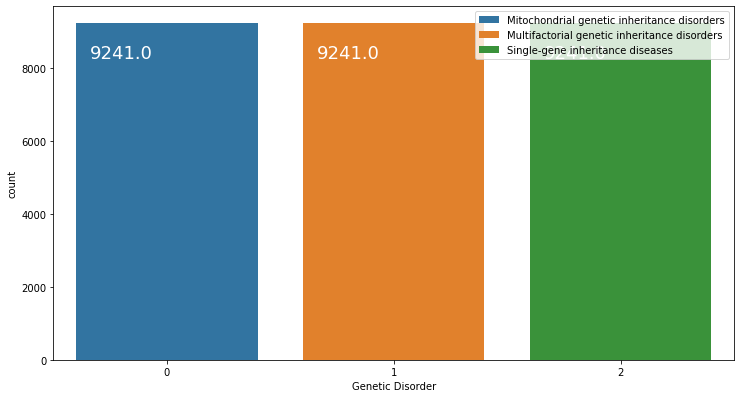

In [ ]:
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 12.2,6.5
ax = sns.countplot(data=df, x="Genetic Disorder", hue='Genetic Disorder', dodge=False) 
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
h,l = ax.get_legend_handles_labels()
labels=["Mitochondrial genetic inheritance disorders", "Multifactorial genetic inheritance disorders",'Single-gene inheritance diseases']
ax.legend(h,labels,loc="upper right") 

plt.show()

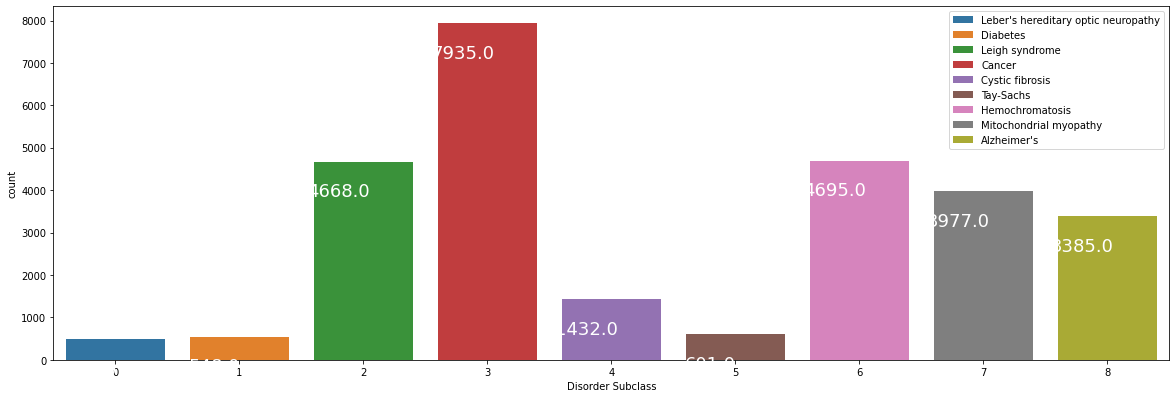

In [ ]:
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,6.5
ax = sns.countplot(data=df, x="Disorder Subclass", hue='Disorder Subclass', dodge=False) 
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
h,l = ax.get_legend_handles_labels()
labels=["Leber's hereditary optic neuropathy", 'Diabetes',
       'Leigh syndrome', 'Cancer', 'Cystic fibrosis', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"]
ax.legend(h,labels,loc="upper right") 
plt.show()

In [ ]:
x=df.drop(['Genetic Disorder','Disorder Subclass'],axis=1)
y=df[['Genetic Disorder','Disorder Subclass']]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.15, random_state=0)

In [13]:
!!pip3 install xgboost

['Requirement already satisfied: xgboost in /usr/local/lib/python3.7/dist-packages (0.90)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.7/dist-packages (from xgboost) (1.4.1)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.7/dist-packages (from xgboost) (1.21.6)']

In [ ]:
from xgboost import XGBClassifier
print("xgboost")
logreg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',max_depth=300,objective='multi:softprob')
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print(score.std())

xgboost
... Processing Genetic Disorder
Accuracy is 0.7032940610723731

[[ 999   63  302]
 [  89 1238   89]
 [ 505  186  688]]

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1364
           1       0.83      0.87      0.85      1416
           2       0.64      0.50      0.56      1379

    accuracy                           0.70      4159
   macro avg       0.70      0.70      0.70      4159
weighted avg       0.70      0.70      0.70      4159


Average score: 0.70
0.006832522841895222
... Processing Disorder Subclass
Accuracy is 0.5450829526328445

[[  32    4    6   27    0    4    1    0    0]
 [   1   35    3   23    8    0    0    0    9]
 [   2    0  310  174    1    8  110   44   19]
 [   0    4   89 1066    1    8   39   17   13]
 [   0    2    0    1   75    0   13   49   87]
 [   1    0   21   36    0   20    7    2    2]
 [   0    0  107   18   14    0  274  193   73]
 [   0    1   42    2   28    1  196  215  114]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
logreg = ExtraTreesClassifier(n_estimators=300,random_state=5, max_depth=300)
cols_target = ['Genetic Disorder','Disorder Subclass']
for label in cols_target:
    print('... Processing {}'.format(label))
    y_train = Y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y_train)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    y_test = Y_test[label]
    print('Accuracy is {}'.format(accuracy_score(y_test,y_pred_X)))
    print()
    print(confusion_matrix(y_test,y_pred_X))
    print()
    print(classification_report(y_test,y_pred_X))
    print()
    score = cross_val_score(logreg, x,y[label], cv= kf, scoring="accuracy")
    print(f'Average score: {"{:.2f}".format(score.mean())}')
    print(score.std())

ETC
... Processing Genetic Disorder
Accuracy is 0.7049771579706661

[[1055   73  236]
 [ 107 1225   84]
 [ 520  207  652]]

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1364
           1       0.81      0.87      0.84      1416
           2       0.67      0.47      0.55      1379

    accuracy                           0.70      4159
   macro avg       0.70      0.70      0.70      4159
weighted avg       0.71      0.70      0.70      4159


... Processing Disorder Subclass
Accuracy is 0.542678528492426

[[  22    6   11   33    0    2    0    0    0]
 [   1   33    2   22    8    0    0    0   13]
 [   1    4  260  232    0    0  129   26   16]
 [   1    1   76 1088    3    1   44   10   13]
 [   0    1    2    2   54    0   20   43  105]
 [   0    0   32   44    0    6    5    1    1]
 [   0    0   80   26   11    1  352  159   50]
 [   0    0   28    9   15    0  246  194  107]
 [   0    1    7    6   26    0   98  121  248

# Deep Learning

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, Conv1D, Dropout,MaxPooling1D,Flatten,Bidirectional,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
def cnn_model(n_classes):
  model = Sequential()
  model.add(Embedding(input_dim=5000,output_dim = 64,input_length=35))
  model.add(Conv1D(filters=256, kernel_size=8,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(filters=128, kernel_size=8,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  # model.add(Dense(64,activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(16,activation = 'relu'))
  # model.add(Dropout(0.2))
  model.add(Dense(n_classes,activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
  return model

In [ ]:
cols_target = ['Genetic Disorder','Disorder Subclass']
i=1
for label in cols_target:
  if i==1:
    model=cnn_model(3)
    i+=1
  elif i==2:
    model=cnn_model(9)
  print('... Processing {}'.format(label))
  y_train = Y_train[label]
  # train the model using X_dtm & y
  model.fit(X_train,to_categorical(y_train),epochs = 20, verbose=1, validation_split=0.1)
  # compute the training accuracy
  y_pred_X = model.predict(X_test)
  y_test = Y_test[label]
  print('Accuracy is {}'.format(accuracy_score(y_test,np.argmax(y_pred_X, axis=1))))
  print()
  print(confusion_matrix(y_test,np.argmax(y_pred_X, axis=1)))
  print()
  print(classification_report(y_test,np.argmax(y_pred_X, axis=1)))
  print()

... Processing Genetic Disorder
Epoch 1/20
663/663 [==============================] - 41s 61ms/step - loss: 0.9666 - accuracy: 0.5030 - val_loss: 0.9299 - val_accuracy: 0.5465
Epoch 2/20
663/663 [==============================] - 41s 61ms/step - loss: 0.9216 - accuracy: 0.5351 - val_loss: 0.9233 - val_accuracy: 0.5520
Epoch 3/20
663/663 [==============================] - 40s 61ms/step - loss: 0.8978 - accuracy: 0.5480 - val_loss: 0.9192 - val_accuracy: 0.5409
Epoch 4/20
663/663 [==============================] - 40s 60ms/step - loss: 0.8736 - accuracy: 0.5619 - val_loss: 0.9112 - val_accuracy: 0.5571
Epoch 5/20
663/663 [==============================] - 39s 60ms/step - loss: 0.8420 - accuracy: 0.5815 - val_loss: 0.9076 - val_accuracy: 0.5668
Epoch 6/20
663/663 [==============================] - 41s 62ms/step - loss: 0.8096 - accuracy: 0.6037 - val_loss: 0.9186 - val_accuracy: 0.5571
Epoch 7/20
663/663 [==============================] - 42s 63ms/step - loss: 0.7695 - accuracy: 0.6228 - 